In [156]:
import gzip
import csv
import scipy
from scipy.misc import derivative
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
data = pd.read_csv('ex9_data.csv.gz',  compression = 'gzip')

In [158]:
data

,x
0,1.162271
1,1.142611
2,1.487702
3,1.214966
4,0.378743
...,...
599,0.249427
600,1.052465
601,1.383870
602,0.792205


### 1. Plot the figure

In [159]:
data_array = data['x']
data_list = list(data_array)

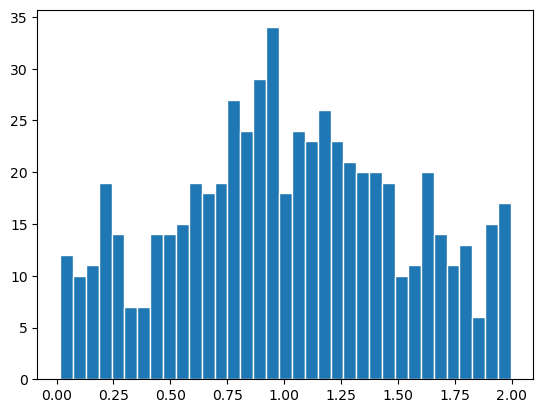

In [160]:
plt.hist(data_array, bins = 35, edgecolor = 'white')
plt.show()

### 2. Write the extended log-likelihood function

Let $x$ be a random variable distributed according to a p.d.f $f(x|\theta)$,

$$x \sim f(x|\theta),$$

with $n$ observations and $m$ unknown parameters. The likelihood would normally then be 

$$L = \prod_{i = 1}^n f(x_i; \theta).$$

If $n$ itself is a Poisson random variable with mean $\nu$,
$$n \sim \text{Pois} \ (n|\nu),$$
then the likelihood can be written as 
$$L(\nu ; \theta) = \frac{\nu^n e^{-\nu}}{n!} \prod_{i = 1}^n f(x_i;\theta).$$

In this exercise, the value $\nu$ is a function of $\theta$, $\nu = \nu(\theta)$, then
$$\text{ln} \ L(\theta) = - \ \nu (\theta) \ - \ \text{ln} \ n! \ + \ \sum_{i = 1}^n \text{ln} \ (\nu f(x_i;\theta))$$

Ignoring the constant term, thus,

$$\boxed{- \ \text{ln} \ L(\theta) = \nu(\theta) \ - \ \sum_{i=1}^n \text{ln} \ \big( \nu(\theta)  \ f(x_i; \theta) \big) }$$

where $\nu  = \nu_b + \nu_s$ and pdf $f(x) = \frac{\nu_s}{\nu} f_s(x) \ + \ \frac{\nu_b}{\nu}f_b(x)$.

### 3. find the maximum likelihood estimate

In [161]:
vb = 420.7

def erf(x):
    def exp_2(t):
        return np.exp(-t**2)
    inte = scipy.integrate.quad(exp_2, 0, x)[0]
    return 2/np.sqrt(np.pi)*inte

def fs(x):
    c = 4/(erf(2*np.sqrt(2))*np.sqrt(2*np.pi))
    return c*np.exp(-1/2*((x-1)/(1/4))**2)

def fb(x):
    return 1/2

def func(x, vs, vb = 420.7):
    return  vs/(vs+vb)*fs(x)+vb/(vs+vb)*fb(x)


In [162]:
def log_likelihood(vs, vb, n):
    v = vs+vb
    
    log = 0
    for x in data_list:
        log += np.log(func(x, vs, vb))
        
    return -(vs+vb)+n*np.log((vs+vb))+log

In [163]:
up_b = 400
low_b = 100

n = len(data_list)
vb = 420.7
vs = low_b
d = []


while vs <= up_b and vs >= low_b:
    de = scipy.misc.derivative(log_likelihood, vs, dx = 1e-6, args = (vb, len(data_list)))
    d.append([de, vs])
    
    if len(d)> 1:
        if d[0][0]*d[1][0] >= 0:
            d.remove(d[0])
        else:
            range_of_vs = (d[0][1], d[1][1])
            value = (d[0][0], d[1][0])
            break
            
    vs += 1


In [164]:
print('The range of vs value = ', range_of_vs)

The range of vs value =  (179, 180)


In [165]:
low_b2, up_b2 = range_of_vs

n = len(data_list)
vb = 420.7
vs2 = low_b2
d2 = []


while vs2 <= up_b2 and vs2 >= low_b2:
    de = scipy.misc.derivative(log_likelihood, vs2, dx = 1e-6, args =(vb, len(data_list)) )
    d2.append([de, vs2])
    
    if len(d2)> 1:
        if d2[0][0]*d2[1][0] >= 0:
            d2.remove(d2[0])
        else:
            range_of_vs2 = (d2[0][1], d2[1][1])
            value = (d2[0][0], d2[1][0])
            break
            
    vs2 += 0.001

print(range_of_vs2)

(179.30400000000145, 179.30500000000146)


In [166]:
x1, x2 = range_of_vs2
print(' maximum likelihood estimate vs = ', np.round((x1+x2)/2, 2))

 maximum likelihood estimate vs =  179.3


In Bayesian context, we have the formula

$$\text{Posterior} \ = \ \text{Likelihood} \ \propto \ \text{Prior}.$$

So, if the prior is a uniform probability distribution for $\nu_s$, then the maximun of Likelihood will coincide with the maximun of Posterior. 

### 4. Make a graphical representation of equally distributed values of $\nu_s$

In [167]:
vs_es = np.round((x1+x2)/2, 2)
                 
dis_of_vs = np.zeros(1001)

x = vs_es-500*0.1
i = 0
while x <= vs_es:
    dis_of_vs[i] = x
    
    x += 0.1
    i += 1

while x < vs_es+500*0.1:
    dis_of_vs[i] = x
    
    x += 0.1
    i += 1

In [168]:
dis_of_vs

array([129.3, 129.4, 129.5, ..., 229.1, 229.2, 229.3])

In [171]:
log_vs_list = []
ln_max = log_likelihood(vs_es, 420.7, len(data_list))

for x in dis_of_vs:
    ln = log_likelihood(x, n = len(data_list), vb = 420.7)
    log_vs_list.append(ln)
    
ln_vs_ar = np.asarray(log_vs_list)

exp_ar = np.exp(ln_vs_ar-ln_max*np.ones(1001))

In [172]:
exp_ar

array([0.0284513 , 0.02888055, 0.02931525, ..., 0.05340781, 0.0528081 ,
       0.05221409])

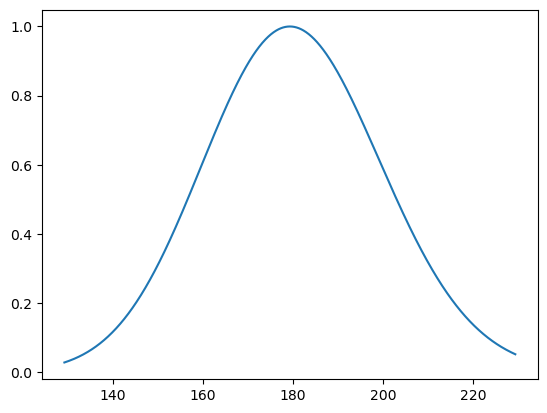

In [173]:
plt.plot(dis_of_vs, exp_ar)
plt.show()

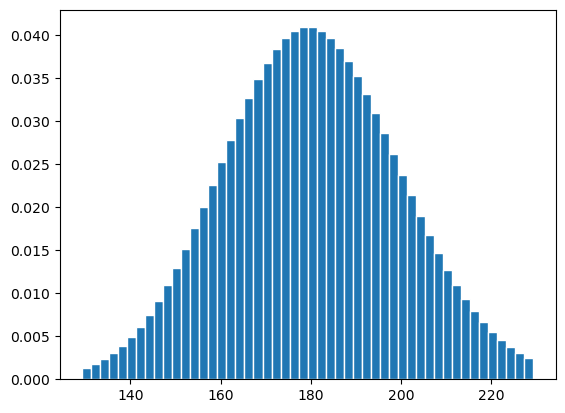

In [206]:
plt.hist(dis_of_vs, weights = exp_ar/np.sum(exp_ar), bins=50, edgecolor = 'white')

plt.show()

### 5. Generate random values for $\nu_s$ uniformly around $\hat{\nu}_s$

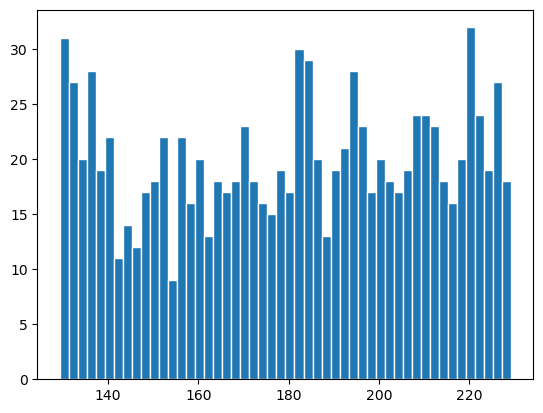

In [175]:
vs_uni = np.random.uniform(vs_es-500*0.1, vs_es+500*0.1, 1001)

plt.hist(vs_uni, bins = 50, edgecolor = 'white' )
plt.show()

In [176]:
vs_uni

array([195.9629292 , 217.89248606, 129.77928014, ..., 143.11860784,
       168.35220213, 213.47967676])

In [179]:
log_vs_list2 = []
ln_max = log_likelihood(vs_es, 420.7, len(data_list))

for x in vs_uni:
    ln = log_likelihood(x, n = len(data_list), vb = 420.7)
    log_vs_list2.append(ln)
    
ln_vs_ar2 = np.asarray(log_vs_list2)
exp_ar2 = np.exp(ln_vs_ar2-ln_max*np.ones(1001))

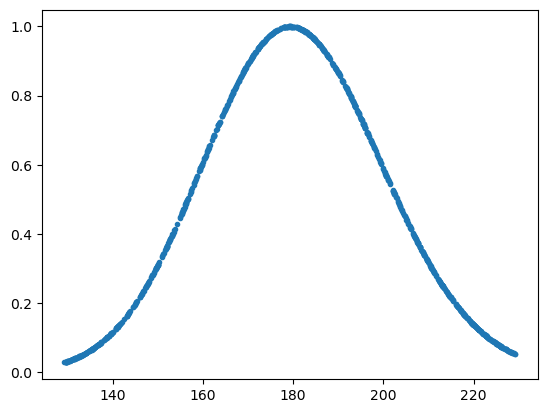

In [180]:
plt.plot(vs_uni, exp_ar2, marker = '.', linestyle = 'None')
plt.show()

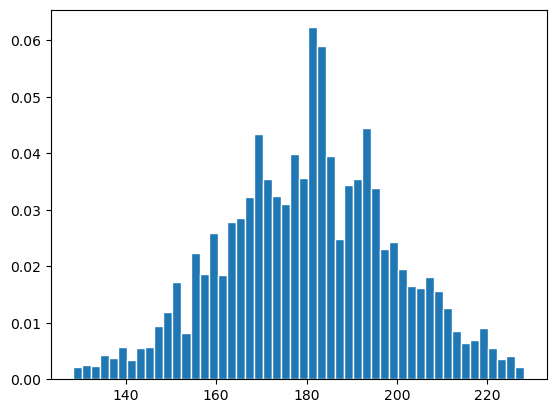

In [207]:
high, widt = np.histogram(vs_uni, weights = exp_ar2/np.sum(exp_ar2), bins=50)
high = high/np.sum(high)

plt.bar(widt[:-1], high, width = widt[1]-widt[0], edgecolor = 'w', label = "Weighted value")
plt.show()

### 6. Represent the same pdf with a Gaussian kernel estimator

In [182]:
from scipy.stats import gaussian_kde

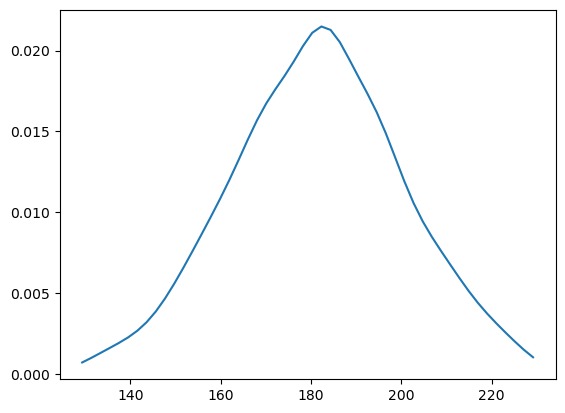

In [183]:
x = np.linspace(np.min(vs_uni), np.max(vs_uni))
kernal = gaussian_kde(vs_uni, weights = exp_ar2)
y_ke = kernal.pdf(x)

plt.plot(x, y_ke)
plt.show()

### 7.  Assuming a different prior distribution

#### Gaussian distribution

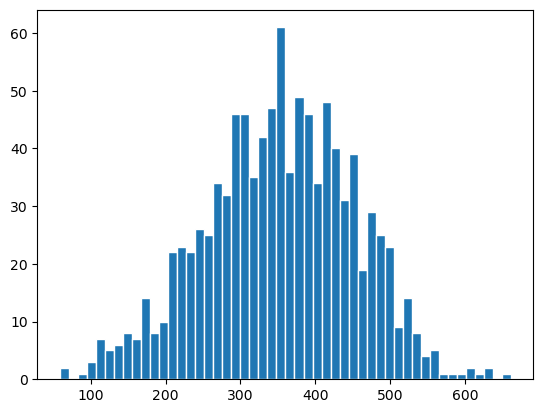

In [209]:
vs_gau = np.random.normal(350, 100 , 1000)

plt.hist(vs_gau, bins = 50, edgecolor = 'white' )
plt.show()

In [210]:
log_vs_list3 = []
ln_max = log_likelihood(vs_es, 420.7, len(data_list))

for x in vs_gau:
    ln = log_likelihood(x, n = len(data_list), vb = 420.7)
    log_vs_list3.append(ln)


ln_vs_ar3 = np.asarray(log_vs_list3)
exp_ar3 = np.exp(ln_vs_ar3-ln_max*np.ones(1000))

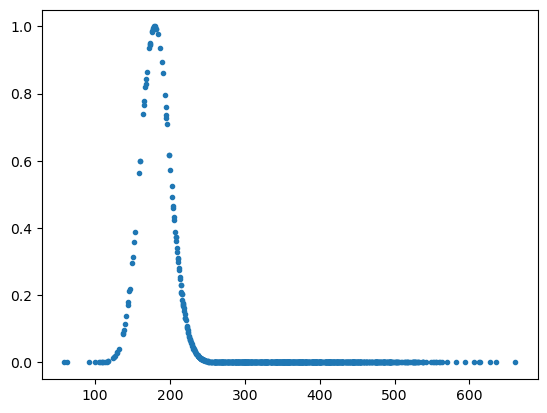

In [211]:
plt.plot(vs_gau, exp_ar3, marker = '.', linestyle = 'None')
plt.show()

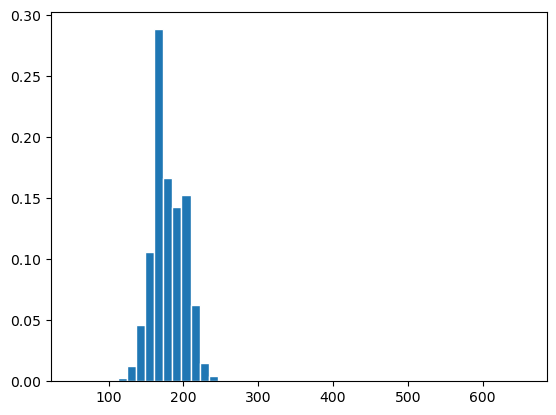

In [212]:
high_g, widt_g = np.histogram(vs_gau, weights = exp_ar3/np.sum(exp_ar3), bins=50)
high_g = high_g/np.sum(high_g)

plt.bar(widt_g[:-1], high_g, width = widt_g[1]-widt_g[0], edgecolor = 'w', label = "Weighted value")
plt.show()

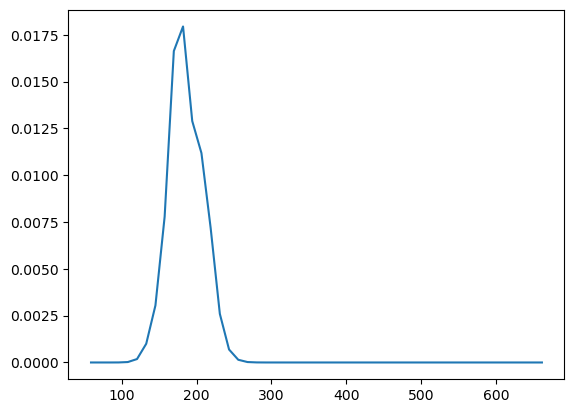

In [213]:
x_g = np.linspace(np.min(vs_gau), np.max(vs_gau))
kernal_g = gaussian_kde(vs_gau, weights = exp_ar3)
y_ke_g = kernal_g.pdf(x_g)

plt.plot(x_g, y_ke_g)
plt.show()

### 8. Considering now the 2D case

In [190]:
def log_likelihood_vs(vs, vb, n = len(data_list)):
    
    log = 0
    for x in data_list:
        log += np.log(func(x, vs, vb))
        
    return -(vs+vb)+n*np.log((vs+vb))+log

def log_likelihood_vb(vb, vs, n = len(data_list)):
    
    log = 0
    for x in data_list:
        log += np.log(func(x, vs, vb))
        
    return -(vs+vb)+n*np.log((vs+vb))+log

#### Assume the maximun estimator of $\nu_b$ is in the range (200, 500), and the maximun estimator of $\nu_s$ is in the range (100, 300)

In [191]:
up_vb = 450
low_vb = 400
up_vs = 200
low_vs = 150

n = len(data_list)
vb = low_vb
dvb = []

while vb <= up_vb and vb >= low_vb:
    
    vs = low_vs
    dvs = []
    
    while vs <= up_vs and vs >= low_vs:
        de_vs = scipy.misc.derivative(log_likelihood_vs, vs, dx = 1e-6, args = (vb, len(data_list)))
        dvs.append([de_vs, vs])
    
        if len(dvs)> 1:
            if dvs[0][0]*dvs[1][0] >= 0:
                dvs.remove(dvs[0])
            else:
                vs_estimator = (dvs[0][1], dvs[1][1])
                value_vs = (dvs[0][0], dvs[1][0])
                break
        vs += 1
        
    vsl, vsu = vs_estimator
    argvs = (vsl+vsu)/2 

    de_vb = scipy.misc.derivative(log_likelihood_vb, vb, dx = 1e-6, args = (argvs, len(data_list)))
    dvb.append([de_vb, vb])
    
    if len(dvb)> 1:
        if dvb[0][0]*dvb[1][0] >= 0:
            dvb.remove(dvb[0])
        else:
            vb_estimator = (dvb[0][1], dvb[1][1])
            value_vb = (dvb[0][0], dvb[1][0])
            print('vb:', vb_estimator, value_vb)
            print('vs:', vs_estimator, value_vs)
            break
            
    vb += 1
    

vb: (428, 429) (0.0009606537787476555, -0.0008510596671840176)
vs: (175, 176) (0.0005240963218966499, -0.00205773176276125)


In [192]:
low_vb2, up_vb2 = vb_estimator
low_vs2, up_vs2 = vs_estimator

n = len(data_list)
vb2 = low_vb2
dvb2 = []

while vb2 <= up_vb2 and vb2 >= low_vb2:
    
    vs2 = low_vs2
    dvs2 = []
    
    while vs2 <= up_vs2 and vs2 >= low_vs2:
        de_vs2 = scipy.misc.derivative(log_likelihood_vs, vs2, dx = 1e-6, args = (vb2, len(data_list)))
        dvs2.append([de_vs2, vs2])
    
        if len(dvs2)> 1:
            if dvs2[0][0]*dvs2[1][0] >= 0:
                dvs2.remove(dvs2[0])
            else:
                vs_estimator2 = (dvs2[0][1], dvs2[1][1])
                value_vs2 = (dvs2[0][0], dvs2[1][0])
                break
        vs2 += 0.05
      
    vsl2, vsu2 = vs_estimator2
    argvs2 = (vsl2+vsu2)/2 
    
    de_vb2 = scipy.misc.derivative(log_likelihood_vb, vb2, dx = 1e-6, args = (argvs2, len(data_list)))
    dvb2.append([de_vb2, vb2])
    
    if len(dvb2)> 1:
        if dvb2[0][0]*dvb2[1][0] >= 0:
            dvb2.remove(dvb2[0])
        else:
            vb_estimator2 = (dvb2[0][1], dvb2[1][1])
            value_vb2 = (dvb2[0][0], dvb2[1][0])
            print('vb:', vb_estimator2, value_vb2)
            print('vs:', vs_estimator2, value_vs2)
            break
            
    vb2 += 0.05

vb: (428.60000000000014, 428.65000000000015) (3.228706191293895e-05, -5.820766091346741e-05)
vs: (175.35000000000008, 175.4000000000001) (6.45741238258779e-05, -6.502887117676437e-05)


### 9. Make a graphical representation of the joint posterior pdf

In [193]:
us, ls = vs_estimator2
ub, lb = vb_estimator2
vs_es_2d = (us+ls)/2
vb_es_2d = (ub+lb)/2

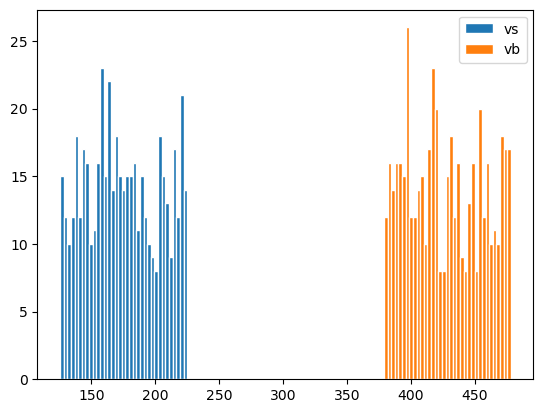

In [194]:
vs_uni_2d = np.random.uniform(vs_es_2d-500*0.1, vs_es_2d+500*0.1, 500)
vb_uni_2d = np.random.uniform(vb_es_2d-500*0.1, vb_es_2d+500*0.1, 500)
plt.hist(vs_uni_2d, bins = 35, edgecolor = 'white', label = 'vs' )
plt.hist(vb_uni_2d, bins = 35, edgecolor = 'white', label = 'vb' )
plt.legend()
plt.show()

In [229]:
vln = []
v_ln_max = log_likelihood_vs(vs_es_2d, vb_es_2d, len(data_list))

for i in range(500):
        ln = log_likelihood_vs(vs_uni_2d[i], vb_uni_2d[i], n = len(data_list))
        vln.append(ln)

vln_ar = np.asarray(vln)
exp_v = np.exp(vln_ar-v_ln_max*np.ones(500))

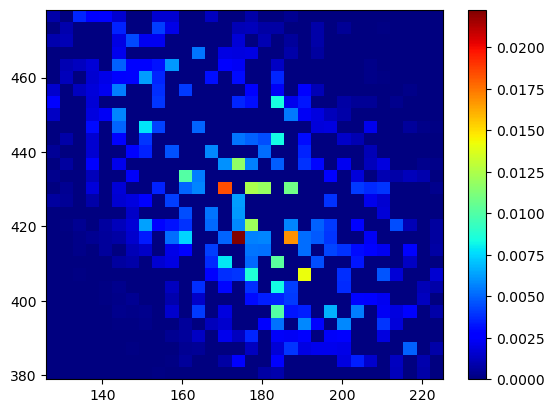

In [234]:
plt.hist2d(vs_uni_2d, vb_uni_2d, weights = (exp_v/np.sum(exp_v)), bins=(30, 30), cmap=plt.cm.jet)

plt.colorbar()
plt.show()

### 10. $\nu_b$ with some uncertainty

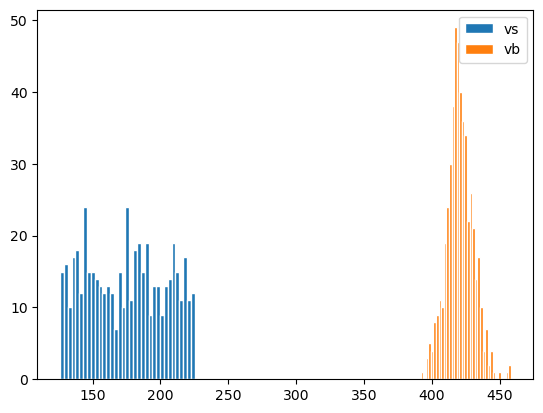

In [225]:
vs_uni_2d = np.random.uniform(vs_es_2d-500*0.1, vs_es_2d+500*0.1, 500)
vb_gau_2d = np.random.normal(420.7, 10 , 500)
plt.hist(vs_uni_2d, bins = 35, edgecolor = 'white', label = 'vs' )
plt.hist(vb_gau_2d, bins = 35, edgecolor = 'white', label = 'vb' )
plt.legend()
plt.show()

In [235]:
vln2 = []
v_ln_max = log_likelihood_vs(vs_es_2d, vb_es_2d, len(data_list))

for i in range(500):
        ln2 = log_likelihood_vs(vs_uni_2d[i], vb_gau_2d[i], n = len(data_list))
        vln2.append(ln2)

vln_ar2 = np.asarray(vln2)
exp_v2 = np.exp(vln_ar2-v_ln_max*np.ones(500))

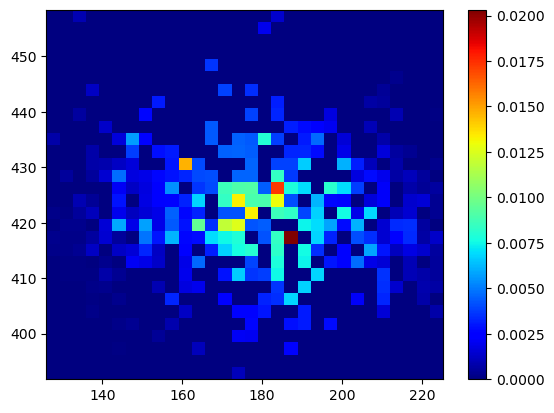

In [237]:
plt.hist2d(vs_uni_2d, vb_gau_2d, weights = exp_v2/np.sum(exp_v2), bins=(30, 30), cmap=plt.cm.jet)

plt.colorbar()
plt.show()